In [1]:
#loading necessary Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/apple_2024/apple_sales_2024.csv")
df

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49


In [3]:
df.isnull().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

In [4]:
#Description of each column
df.describe()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.444500,8.565880,5.555760,6.935500,12.447130
std,7.180077,3.735994,2.506491,2.951677,4.306347
min,5.030000,2.020000,1.010000,2.000000,5.010000
25%,11.447500,5.432500,3.470000,4.330000,8.710000
50%,17.130000,8.695000,5.550000,6.815000,12.205000
75%,23.715000,11.740000,7.730000,9.532500,16.252500
max,29.940000,14.990000,9.990000,12.000000,19.920000


In [5]:
df.dtypes

State                               object
Region                              object
iPhone Sales (in million units)    float64
iPad Sales (in million units)      float64
Mac Sales (in million units)       float64
Wearables (in million units)       float64
Services Revenue (in billion $)    float64
dtype: object

In [6]:
Region_revenue_contribution = df.groupby('Region')['Services Revenue (in billion $)'].sum().reset_index()
Region_revenue_contribution
Region_revenue_contribution_sort = Region_revenue_contribution.sort_values(by ='Services Revenue (in billion $)' , ascending = False)
Region_revenue_contribution_sort

,Region,Services Revenue (in billion $)
1,Greater China,2780.72
4,Rest of World,2701.75
0,Europe,2416.30
2,North America,2281.21
3,Rest of Asia,2267.15


In [7]:
Total_sales = df[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].sum()
print ('Product total sales '),Total_sales

Product total sales 


(None,
 iPhone Sales (in million units)    17444.50
 iPad Sales (in million units)       8565.88
 Mac Sales (in million units)        5555.76
 Wearables (in million units)        6935.50
 dtype: float64)

In [8]:
#Percentage contributed by each product
product_percentage_contribution = (Total_sales / Total_sales.sum())* 100
product_percentage_contribution

iPhone Sales (in million units)    45.308460
iPad Sales (in million units)      22.248091
Mac Sales (in million units)       14.429931
Wearables (in million units)       18.013518
dtype: float64

In [9]:
#Correlation Analysis

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
iPhone Sales (in million units),1.000000,0.036369,-0.032897,-0.060170,-0.022230
iPad Sales (in million units),0.036369,1.000000,0.018415,0.006530,0.009532
Mac Sales (in million units),-0.032897,0.018415,1.000000,-0.020911,0.013479
Wearables (in million units),-0.060170,0.006530,-0.020911,1.000000,0.024834
Services Revenue (in billion $),-0.022230,0.009532,0.013479,0.024834,1.000000


In [11]:
region_correrlation = df.groupby('Region').corr()
region_correrlation

iPhone Sales (in million units)  \
Region                                                                           
Europe        iPhone Sales (in million units)                         1.000000   
              iPad Sales (in million units)                          -0.064682   
              Mac Sales (in million units)                           -0.133051   
              Wearables (in million units)                            0.003742   
              Services Revenue (in billion $)                        -0.001440   
Greater China iPhone Sales (in million units)                         1.000000   
              iPad Sales (in million units)                           0.039645   
              Mac Sales (in million units)                           -0.135443   
              Wearables (in million units)                            0.001146   
              Services Revenue (in billion $)                        -0.100459   
North America iPhone Sales (in million units)                         1.000000   
              iPad Sales (in million units)                          -0.032522   
              Mac Sales (in million units)                            0.205246   
              Wearables (in million units)                           -0.131765   
              Services Revenue (in billion $)                         0.055633   
Rest of Asia  iPhone Sales (in million units)                         1.000000   
              iPad Sales (in million units)                           0.107185   
              Mac Sales (in million units)                           -0.130722   
              Wearables (in million units)                           -0.082808   
              Services Revenue (in billion $)                        -0.042996   
Rest of World iPhone Sales (in million units)                         1.000000   
              iPad Sales (in million units)                           0.120399   
              Mac Sales (in million units)                            0.054868   
              Wearables (in million units)                           -0.112980   
              Services Revenue (in billion $)                        -0.012476   

                                               iPad Sales (in million units)  \
Region                                                                         
Europe        iPhone Sales (in million units)                      -0.064682   
              iPad Sales (in million units)                         1.000000   
              Mac Sales (in million units)                          0.038310   
              Wearables (in million units)                         -0.003298   
              Services Revenue (in billion $)                      -0.055716   
Greater China iPhone Sales (in million units)                       0.039645   
              iPad Sales (in million units)                         1.000000   
              Mac Sales (in million units)                          0.010073   
              Wearables (in million units)                          0.003546   
              Services Revenue (in billion $)                       0.108600   
North America iPhone Sales (in million units)                      -0.032522   
              iPad Sales (in million units)                         1.000000   
              Mac Sales (in million units)                         -0.033314   
              Wearables (in million units)                          0.014201   
              Services Revenue (in billion $)                      -0.018479   
Rest of Asia  iPhone Sales (in million units)                       0.107185   
              iPad Sales (in million units)                         1.000000   
              Mac Sales (in million units)                         -0.060580   
              Wearables (in million units)                          0.113051   
              Services Revenue (in billion $)                       0.046183   
Rest of World iPhone Sales (in million units)                       0.12

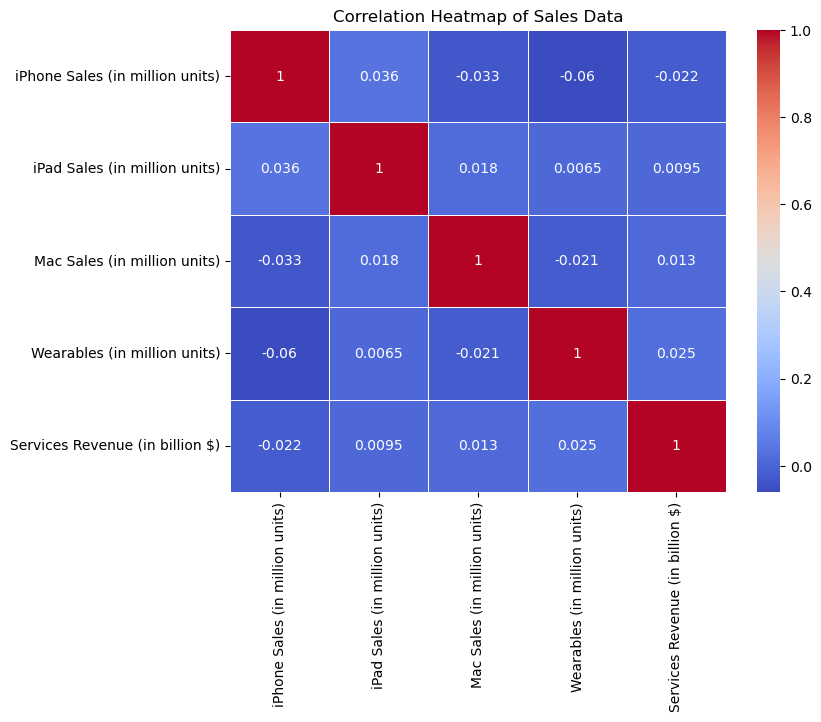

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Sales Data")
plt.show()

BASIC ANALYSIS

In [23]:
df.columns

Index(['State', 'Region', 'iPhone Sales (in million units)',
       'iPad Sales (in million units)', 'Mac Sales (in million units)',
       'Wearables (in million units)', 'Services Revenue (in billion $)',
       'Cluster'],
      dtype='object')

In [24]:
#1. What is the total number of iPhones, iPads, Macs, and Wearables sold across all regions?  


Region_product_total = df.groupby('Region')[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].sum().reset_index()
print('Total sales of products per Region' )
Region_product_total

Total sales of products per Region


,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
0,Europe,3563.12,1745.66,1111.22,1353.12
1,Greater China,3868.28,1862.95,1212.80,1514.86
2,North America,3124.14,1625.44,1028.96,1272.92
3,Rest of Asia,3091.50,1473.26,982.94,1296.29
4,Rest of World,3797.46,1858.57,1219.84,1498.31


In [25]:
# What is the average service revenue per state? 
Avg_revenue_State = df.groupby('State')['Services Revenue (in billion $)'].mean().reset_index()
print('Average Service revenue per state')
Avg_revenue_State

Average Service revenue per state


,State,Services Revenue (in billion $)
0,Australia,12.585814
1,Beijing,12.372791
2,Brazil,11.378478
3,California,12.588723
4,Canada,11.959783
5,Chongqing,13.398250
6,Florida,12.464231
7,France,12.793256
8,Germany,11.325676
9,Hong Kong,12.630200


In [26]:
State_unique = df.groupby('State')['State'].count()
State_unique

State
Australia       43
Beijing         43
Brazil          46
California      47
Canada          46
Chongqing       40
Florida         26
France          43
Germany         37
Hong Kong       50
Illinois        35
India           33
Indonesia       38
Italy           38
Japan           40
Mexico          39
New York        37
Shanghai        43
Shenzhen        43
South Africa    47
South Korea     34
Spain           39
Texas           33
Thailand        33
UK              47
Name: State, dtype: int64

In [27]:
# 3. Which region has the highest total service revenue? 
Region_highest_revenue = df.groupby('Region')['Services Revenue (in billion $)'].sum().reset_index()
print('Region with the highest Service revenue ')
Region_highest_revenue.sort_values(by='Services Revenue (in billion $)',ascending = False)

Region with the highest Service revenue 


,Region,Services Revenue (in billion $)
1,Greater China,2780.72
4,Rest of World,2701.75
0,Europe,2416.30
2,North America,2281.21
3,Rest of Asia,2267.15


In [28]:
#No conclusion can be drawn from this because the the population of the region is not considered!

In [29]:
# 4. What is the average number of products sold (iPhone, iPad, Mac, Wearables) per state?  
Avg_product_sold_state = df.groupby('State')[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].mean().reset_index()
print('Average product per state')
Avg_product_sold_state

Average product per state


,State,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
0,Australia,14.952558,9.155349,5.556512,6.220930
1,Beijing,17.610930,8.006512,5.540465,6.623953
2,Brazil,18.358696,8.814130,5.235652,7.147174
3,California,17.943404,9.784255,5.337872,7.341064
4,Canada,17.058261,7.236304,5.733261,6.506522
5,Chongqing,16.315000,9.038500,5.244000,7.025000
6,Florida,18.450000,8.784231,6.326538,7.564231
7,France,16.841628,7.591395,5.342791,8.179535
8,Germany,17.793243,8.344054,5.737297,6.054324
9,Hong Kong,18.681200,9.264800,5.367400,7.056600


In [30]:
#5. Which state recorded the highest iPhone sales? 
State_iphone_highest_sales = df.groupby('State')['iPhone Sales (in million units)'].sum().reset_index()
print('State with the highest iphone sales')
State_iphone_highest_sales.sort_values(by= 'iPhone Sales (in million units)', ascending = False)


State with the highest iphone sales


,State,iPhone Sales (in million units)
9,Hong Kong,934.06
2,Brazil,844.50
3,California,843.34
19,South Africa,831.40
24,UK,810.31
4,Canada,784.68
18,Shenzhen,766.15
17,Shanghai,758.20
1,Beijing,757.27
14,Japan,739.25


In [31]:
#6. How does the average service revenue compare across different regions?  
Avg_revenue_region = df.groupby('Region')['Services Revenue (in billion $)'].mean().reset_index()
Avg_revenue_region.columns = ['Region', 'Average Service Revenue']
Avg_revenue_region.sort_values(by= 'Average Service Revenue', ascending= False)

,Region,Average Service Revenue
2,North America,12.815787
3,Rest of Asia,12.736798
1,Greater China,12.697352
4,Rest of World,12.225113
0,Europe,11.844608


In [32]:
# 7. What is the distribution of Mac sales across all states? 
State_distribution_mac_sales= df.groupby('State')['Mac Sales (in million units)'].mean().reset_index()
State_distribution_mac_sales.columns =['State', 'Mac sales']
State_distribution_mac_sales

,State,Mac sales
0,Australia,5.556512
1,Beijing,5.540465
2,Brazil,5.235652
3,California,5.337872
4,Canada,5.733261
5,Chongqing,5.244000
6,Florida,6.326538
7,France,5.342791
8,Germany,5.737297
9,Hong Kong,5.367400


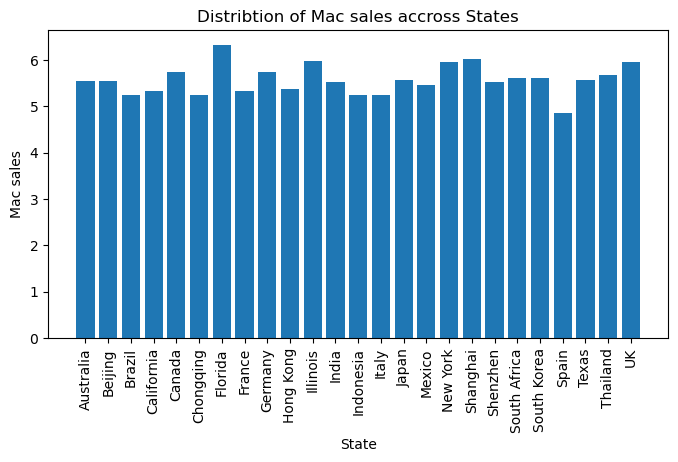

In [33]:
# bar graph to show distribution
plt.figure(figsize=(8, 4))

plt.bar(State_distribution_mac_sales['State'], State_distribution_mac_sales['Mac sales'])

plt.title('Distribtion of Mac sales accross States')
plt.xlabel('State')
plt.ylabel('Mac sales')

plt.xticks(rotation = 90) 
plt.show()

In [34]:
#8. Which product has the highest average unit sales across all regions? 
numeric_value =['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']
Avg_product_sold_region = df.groupby('Region')[numeric_value ].mean().reset_index()
print('Average product per Region')
Avg_product_sold_region

# Calculate the overall average across all regions
overall_average_sales =Avg_product_sold_region[numeric_value].mean()

# Identify the product with the highest average sales
highest_avg_product = overall_average_sales.idxmax()
highest_avg_value = overall_average_sales.max()

# Display results
print("Product with the highest average unit sales across all regions:")
print(f"{highest_avg_product}: {highest_avg_value:.2f} units")


Average product per Region
Product with the highest average unit sales across all regions:
iPhone Sales (in million units): 17.45 units


In [35]:
#9. Are there states where service revenue is zero or significantly lower than the average?

# Calculate the average and standard deviation of service revenue
avg_service_revenue = df['Services Revenue (in billion $)'].mean()
std_service_revenue = df['Services Revenue (in billion $)'].std()

Zero_state_revenue = df[df['Services Revenue (in billion $)']== 0]['State']
low_revenue_region = df[df['Services Revenue (in billion $)'] < (avg_service_revenue - std_service_revenue)]["Region"]

print(f"States with zero service revenue: {Zero_state_revenue.tolist()}")
print(f"Region with significantly lower service revenue: {low_revenue_region.tolist()}")

States with zero service revenue: []
Region with significantly lower service revenue: ['Greater China', 'Europe', 'Rest of World', 'Rest of World', 'Europe', 'Greater China', 'Rest of World', 'North America', 'Europe', 'Europe', 'North America', 'Rest of World', 'Europe', 'Rest of World', 'Europe', 'Greater China', 'Rest of Asia', 'North America', 'Greater China', 'North America', 'Rest of World', 'Greater China', 'Europe', 'Greater China', 'Europe', 'Greater China', 'Rest of World', 'Rest of World', 'Greater China', 'Greater China', 'Rest of Asia', 'Greater China', 'Rest of World', 'Rest of World', 'Greater China', 'Greater China', 'North America', 'Greater China', 'Europe', 'Greater China', 'Europe', 'Rest of World', 'Rest of Asia', 'Rest of World', 'Rest of Asia', 'North America', 'Europe', 'North America', 'North America', 'Europe', 'Greater China', 'Rest of World', 'Greater China', 'Rest of Asia', 'Rest of Asia', 'Europe', 'Rest of World', 'Rest of Asia', 'Europe', 'Greater China'

In [36]:
#10. What is the standard deviation of service revenue to understand its variability?
std_service_revenue = df['Services Revenue (in billion $)'].std()
std_service_revenue


4.306346953879494

In [37]:
avg_service_revenue = df['Services Revenue (in billion $)'].mean()
avg_service_revenue

12.447130000000012

INTERMEDIATE ANALYSIS

In [38]:
#Is there a correlation between iPhone sales and service revenue? 
iphone_corr_revenue = df['iPhone Sales (in million units)'].corr(df['Services Revenue (in billion $)'])
print ('correlation between Iphone and service revenue')
iphone_corr_revenue 

correlation between Iphone and service revenue


-0.022229676653632745

In [39]:
#. How do product sales (iPhone, iPad, Mac, Wearables) correlate with each other? 
correlation_matrix = df[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].corr()
correlation_matrix

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
iPhone Sales (in million units),1.000000,0.036369,-0.032897,-0.060170
iPad Sales (in million units),0.036369,1.000000,0.018415,0.006530
Mac Sales (in million units),-0.032897,0.018415,1.000000,-0.020911
Wearables (in million units),-0.060170,0.006530,-0.020911,1.000000


In [41]:
#Are there any states where one product dominates total sales (e.g., iPhones make up over 70% of product sales)? 
df["Total_Product_Sales"] =df[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].sum(axis=1)
df

# Compute percentage contribution of each product per state
df['iPhone_Percentage'] = (df["iPhone Sales (in million units)"] / df["Total_Product_Sales"]) * 100
df['iPad_Percentage'] = (df["iPad Sales (in million units)"] / df["Total_Product_Sales"]) * 100
df['Mac_Percentage'] = (df["Mac Sales (in million units)"] / df["Total_Product_Sales"]) * 100
df['Wearable_Percentage']= (df["Wearables (in million units)"] / df["Total_Product_Sales"]) * 100

# Filter states where any product contributes more than 70%
dominant_product_states = df[(df["iPhone_Percentage"] > 70) | 
                             (df["iPad_Percentage"] > 70) | 
                             (df["Mac_Percentage"] > 70) | 
                             (df["Wearable_Percentage"] > 70)][["State", "iPhone_Percentage", "iPad_Percentage", "Mac_Percentage", "Wearable_Percentage"]]
dominant_product_states

,State,iPhone_Percentage,iPad_Percentage,Mac_Percentage,Wearable_Percentage
143,Brazil,74.956971,11.560528,3.815261,9.667240
197,Canada,72.512953,5.647668,6.191710,15.647668
258,Mexico,72.534637,12.686770,6.574300,8.204292
290,Thailand,70.913520,13.861145,6.406821,8.818514
332,Italy,74.745935,10.696138,5.436992,9.120935
392,Texas,70.494552,10.813076,9.346186,9.346186
540,Chongqing,71.151439,13.047559,5.569462,10.231539
764,Canada,74.647887,6.323045,4.345220,14.683848
866,Indonesia,75.327291,5.211480,12.713998,6.747231
897,Indonesia,71.588303,7.396789,13.130734,7.884174


In [50]:
#How do the trends in product sales compare between high-revenue and low-revenue states? 
Median_revenue = df['Services Revenue (in billion $)'].median()
 
# Classify states as high-revenue or low-revenue
df['Revenue_Category'] = df['Services Revenue (in billion $)'].apply(lambda x: "High Revenue" if x >= Median_revenue else "Low Revenue")

Sales_comparison = df.groupby('Revenue_Category')[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].mean().reset_index()
Sales_comparison 

,Revenue_Category,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
0,High Revenue,17.33832,8.56558,5.59488,7.01842
1,Low Revenue,17.55068,8.56618,5.51664,6.85258


In [43]:
#Does the region influence the relationship between product sales and service revenue?  

In [44]:
#What is the percentage contribution of each product to the total units sold?  
product_percentage_contribution = (Total_sales / Total_sales.sum())* 100
product_percentage_contribution

iPhone Sales (in million units)    45.308460
iPad Sales (in million units)      22.248091
Mac Sales (in million units)       14.429931
Wearables (in million units)       18.013518
dtype: float64

In [ ]:
#Are there seasonal patterns in product sales if time-related data is available?
# Answer: No time related data is available

In [49]:
# Grouping total product sales by region
Region_total_product = df.groupby('Region')[['iPhone Sales (in million units)', 
                                             'iPad Sales (in million units)', 
                                             'Mac Sales (in million units)', 
                                             'Wearables (in million units)']].sum()

# Grouping total service revenue by region
Region_total_revenue = df.groupby('Region')['Services Revenue (in billion $)'].sum()

# Calculate total product units sold per region
Region_total_product['Total Product Units'] = Region_total_product.sum(axis=1)

# Compute ratio: Service Revenue / Total Product Units Sold
Region_total_product['Service Revenue per Unit'] = Region_total_revenue / Region_total_product['Total Product Units']

# Display only the ratio column
Ratio_revenue_product = Region_total_product[['Service Revenue per Unit']]
print(Ratio_revenue_product)


               Service Revenue per Unit
Region                                 
Europe                         0.310853
Greater China                  0.328733
North America                  0.323509
Rest of Asia                   0.331261
Rest of World                  0.322629


In [ ]:
#Can we identify outlier states where product sales are unusually high or low compared to others?